In [2]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
negative_benchmarks = open("../experiments/negative_benchmarks.txt", "r").read().split("\n")
len(negative_benchmarks)


80

In [4]:
all_benchmarks = open("../experiments/one_loop_one_method_no_arrays.txt").read().split('\n')
len(all_benchmarks)

535

In [5]:
positive_benchmarks = list(set(all_benchmarks) - set(negative_benchmarks))

In [5]:
with open("../experiments/positive_benchmarks.txt", "w") as f:
    f.write("\n".join(positive_benchmarks))

In [6]:
import random


positive_benchmarks_shuffled_1 = random.sample(positive_benchmarks, 80)
positive_benchmarks_shuffled_2 = random.sample(positive_benchmarks, 80)
positive_benchmarks_shuffled_3 = random.sample(positive_benchmarks, 80)
positive_benchmarks_shuffled_4 = random.sample(positive_benchmarks, 80)

In [18]:
negative_benchmarks_shuffled = random.sample(negative_benchmarks, 80)

In [19]:
with open("../experiments/classification.txt", "w") as f:
    f.write("\n".join(positive_benchmarks_shuffled + negative_benchmarks_shuffled))

In [10]:
with open("../experiments/classification4.txt", "w") as f:
    f.write("\n".join(positive_benchmarks_shuffled_4))

In [12]:
classification_json = []
classification_files = open("../experiments/classification4.txt").read().split("\n")
for file in classification_files:
    new_json = {
        "file": file,
        "label": True if file in positive_benchmarks else False
    }
    classification_json.append(new_json)

In [13]:
with open("../experiments/classification4.json", "w") as f:
    json.dump(classification_json, f, indent=4)

In [2]:
minimal_prompt_dir = "../logs/loopy_2023_08_17_03_55_30/final_rechecked_re_filtered.json_processed/"
without_nudges_dir = "../logs/loopy_2023_08_25_13_52_59/final_rechecked_re_filtered.json_processed/"
with_nudges_dir = "../logs/loopy_2023_08_13_23_52_42/final_rechecked_rechecked_re_filtered.json_processed/"

In [3]:
mp_dir = "../logs/loopy_2023_08_17_03_55_30/"
won_dir = "../logs/loopy_2023_08_25_13_52_59/"
wn_dir = "../logs/loopy_2023_08_13_23_52_42/"

In [4]:
filtered_benchmarks_file = open("../experiments/one_loop_one_method_no_arrays.txt").read().split('\n')

In [5]:
expected_benchmarks = [x.replace(".c", ".json").replace("../", "").replace("/", "__").replace("data__", "") for x in filtered_benchmarks_file]

In [6]:
wn_p_lf_1 = open("../logs/loopy_2023_08_25_13_54_09/final_rechecked_re_filtered.json", "r", encoding="utf-8")
wn_p_l = json.load(wn_p_lf_1)
wn_p_l = wn_p_l["logs"]
wn_p_lf_1.close()
wn_p_lf_2 = open("../logs/loopy_2023_08_13_23_52_42/final_rechecked_rechecked_re_filtered.json", "r", encoding="utf-8")
wn_p_l_2 = json.load(wn_p_lf_2)
wn_p_l_2 = wn_p_l_2["logs"]
wn_p_lf_2.close()

won_p_lf_1 = open("../logs/loopy_2023_08_25_13_52_59/final_rechecked_re_filtered.json", "r", encoding="utf-8")
won_p_l = json.load(won_p_lf_1)
won_p_l = won_p_l["logs"]
won_p_lf_1.close()
won_p_lf_2 = open("../logs/loopy_2023_08_13_23_52_36/final_rechecked_rechecked_re_filtered.json", "r", encoding="utf-8")
won_p_l_2 = json.load(won_p_lf_2)
won_p_l_2 = won_p_l_2["logs"]
won_p_lf_2.close()

wn_success = []
for c5, c10 in zip(wn_p_l, wn_p_l_2):
    if "completions" in c5 and (c5["checker_output"] or c5["checker_output_after_combine_and_prune"]):
        wn_success.append(c5["file"])
        continue
    if "completions" in c10 and (c10["checker_output"] or c10["checker_output_after_combine_and_prune"]):
        wn_success.append(c10["file"])
        continue

won_success = []
for c5, c10 in zip(won_p_l, won_p_l_2):
    if "completions" in c5 and (c5["checker_output"] or c5["checker_output_after_combine_and_prune"]):
        won_success.append(c5["file"])
        continue
    if "completions" in c10 and (c10["checker_output"] or c10["checker_output_after_combine_and_prune"]):
        won_success.append(c10["file"])
        continue

In [7]:
log_m_p = {i:{"pass_k": 0.0, "pass_k_prune": 0.0} for i in range(1, 16)}
log_wo_n = {i:{"pass_k": 0.0, "pass_k_prune": 0.0} for i in range(1, 16)}
log_w_n = {i:{"pass_k": 0.0, "pass_k_prune": 0.0} for i in range(1, 16)}

for file in os.listdir(minimal_prompt_dir):
    if file in expected_benchmarks:
        mp_log = json.load(open(minimal_prompt_dir + file))
        for i, pk in enumerate(mp_log["pass_at_k"]):
            log_m_p[i + 1]["pass_k"] += pk

        for j, pk in enumerate(mp_log["pass_at_k_prune"]):
            log_m_p[j + 1]["pass_k_prune"] += pk

for file in os.listdir(without_nudges_dir):
    if file in expected_benchmarks:
        won_log = json.load(open(without_nudges_dir + file))
        for i, pk in enumerate(won_log["pass_at_k"]):
            log_wo_n[i + 1]["pass_k"] += pk

        for j, pk in enumerate(won_log["pass_at_k_prune"]):
            log_wo_n[j + 1]["pass_k_prune"] += pk

for file in os.listdir(with_nudges_dir):
    if file in expected_benchmarks:
        wn_log = json.load(open(with_nudges_dir + file))
        for i, pk in enumerate(wn_log["pass_at_k"]):
            log_w_n[i + 1]["pass_k"] += pk

        for j, pk in enumerate(wn_log["pass_at_k_prune"]):
            log_w_n[j + 1]["pass_k_prune"] += pk

In [8]:
wn_pt2_success = []
for file in os.listdir(with_nudges_dir):
    if file in expected_benchmarks:
        wn_log = json.load(open(with_nudges_dir + file))
        if wn_log["pass_at_k_prune"][14]:
            wn_pt2_success.append(file)

In [9]:
len(wn_pt2_success)

266

In [12]:
len(wn_success_json)

275

In [11]:
wn_success_json = [x.replace(".c", ".json").replace("../", "").replace("/", "__").replace("data__", "") for x in wn_success]

In [15]:
with open("gpt_4_success.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(wn_success))

In [13]:
ultimate_success_json = None
with open("../src/new_output.json", "r", encoding="utf-8") as f:
    ultimate_success_json = json.load(f)


In [1]:
import json

In [3]:
code2inv_success_json = None
with open("../src/ultimate/codetoinv_output.json", "r", encoding="utf-8") as f:
    code2inv_success_json = json.load(f)

code2inv_success = []
for key, value in code2inv_success_json.items():
    if (value["result"] == "Proved"):
        code2inv_success.append(key)

In [4]:
len(code2inv_success)

122

In [14]:
ultimate_success = []
for key, value in ultimate_success_json.items():
    if (value["result"] == "Proved"):
        ultimate_success.append(key)

In [15]:
ultimate_disproved = []
for key, value in ultimate_success_json.items():
    if (value["result"] == "Disproved"):
        ultimate_disproved.append(key)

In [19]:
len(wn_success), len(ultimate_success)

In [3]:
qualitative_results = [
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_1.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_2.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loop-acceleration/overflow_1-1.c',
    '../data/new_benchmarks/original_benchmarks/accelerating_invariant_generation/crafted/overflow_safe1.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/even.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/mod4.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/odd.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loops/sum03-2.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loops-crafted-1/vnew2.c',
    '../data/new_benchmarks/original_benchmarks/sv-benchmarks/loop-lit/ddlm2013.c',
    '../data/new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-lit/ddlm2013_true-unreach-call.c',
]

In [4]:
qualitative_results = [x.replace("../data/", "../") for x in qualitative_results]

In [18]:
with open("gpt_4_success.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(wn_success + qualitative_results))

In [6]:
gpt_4_success_file = open("gpt_4_success.txt", "r", encoding="utf-8")
gpt_4_success = gpt_4_success_file.read().split("\n")
gpt_4_success_file.close()

In [8]:
len(gpt_4_success)

286

In [9]:
ultimate_success_file = open("ultimate_success.txt", "r", encoding="utf-8")
ultimate_success = ultimate_success_file.read().split("\n")
ultimate_success_file.close()
len(ultimate_success)

301

In [10]:
set(gpt_4_success) - set(ultimate_success)

{'../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/invgen/rajamani_1.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_2_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loops/count_up_down_true-unreach-call_true-termination.i.annot.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/02.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/05.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/30.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/05.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/gulv.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/pldi082_unbounded.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/crafted/phases_safe1.c',
 '../new_benchmarks/original_benchmar

In [19]:
ultimate_success_files = [x.replace("../data/", "../") for x in ultimate_success]

In [5]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

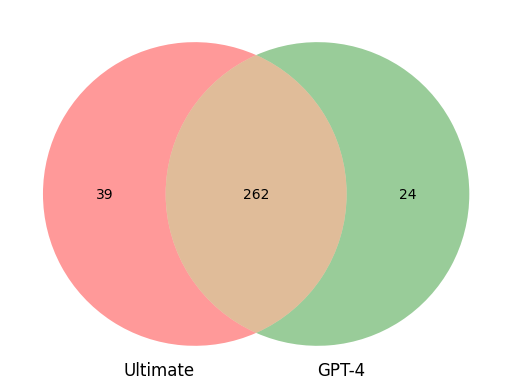

In [21]:
venn2_unweighted(subsets = (39, 24, 262), set_labels = ('Ultimate', 'GPT-4'))

plt.savefig('graphs/venn.png')
plt.show()

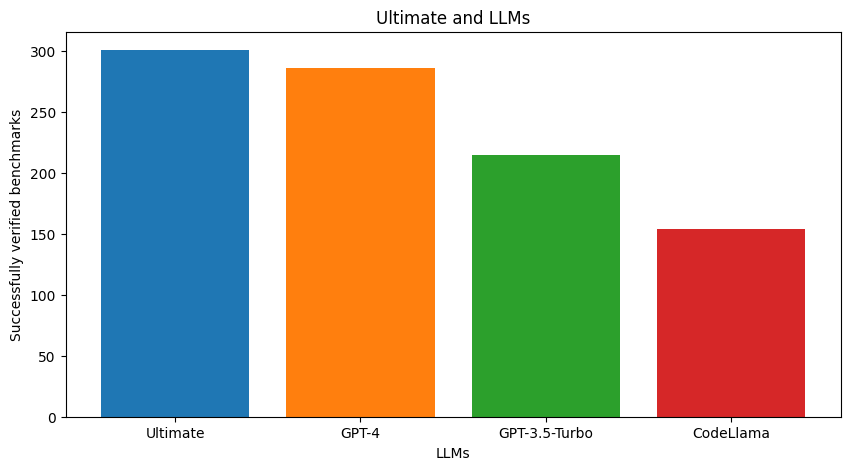

In [48]:
_ = plt.figure(figsize=(10, 5))
_ = plt.title("Ultimate and LLMs")
_ = plt.xlabel("LLMs")
_ = plt.ylabel("Successfully verified benchmarks")
y = [301, 286, 215, 154]
x = ['Ultimate', 'GPT-4', 'GPT-3.5-Turbo', 'CodeLlama']
_ = plt.bar(x, y)
_ = plt.savefig("graphs/comparison.png", dpi=300)
plt.show()

In [25]:
with open("ultimate_success.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(ultimate_success_files))

In [40]:
len(set(wn_success + qualitative_results).intersection(set(ultimate_success_files)))

262

In [41]:
len(set(ultimate_success_files).difference(set(wn_success + qualitative_results)))

39

In [42]:
len(set(wn_success + qualitative_results).difference(set(ultimate_success_files)))

24

In [30]:
diff1 = (list(set(expected_benchmarks).difference(set(wn_success_json))))

In [29]:
diff2 = (list(set(expected_benchmarks).difference(set(wn_pt2_success))))

In [32]:
(list(set(diff2).difference(set(diff1))))

['new_benchmarks__original_benchmarks__LinearArbitrary-SeaHorn__pie__ICE__benchmarks__trex03.v.json',
 'new_benchmarks__original_benchmarks__LinearArbitrary-SeaHorn__invgen__up-nested.json',
 'new_benchmarks__original_benchmarks__LinearArbitrary-SeaHorn__pie__ICE__benchmarks__fig3.v.json',
 'new_benchmarks__original_benchmarks__sv-benchmarks__loop-zilu__benchmark47_linear.json',
 'new_benchmarks__original_benchmarks__sv-benchmarks__loops-crafted-1__sumt6.json',
 'new_benchmarks__original_benchmarks__sv-benchmarks__loop-zilu__benchmark29_linear.json',
 'new_benchmarks__original_benchmarks__LinearArbitrary-SeaHorn__VeriMAP__TRACER-testloop13_VeriMAP_true.json',
 'new_benchmarks__original_benchmarks__LinearArbitrary-SeaHorn__invgen__gulwani_fig1a.json',
 'new_benchmarks__original_benchmarks__LinearArbitrary-SeaHorn__pie__ICE__benchmarks__sum01_safe.json']

In [34]:
list = [
    'new_benchmarks__original_benchmarks__LinearArbitrary-SeaHorn__pie__ICE__benchmarks__fig3.v.json',
    'new_benchmarks__original_benchmarks__sv-benchmarks__loop-zilu__benchmark47_linear.json',
    'new_benchmarks__original_benchmarks__sv-benchmarks__loops-crafted-1__sumt6.json',
]

In [7]:
log_w_n

{1: {'pass_k': 117.80000000000003, 'pass_k_prune': 183.40000000000012},
 2: {'pass_k': 143.59999999999997, 'pass_k_prune': 215.20000000000007},
 3: {'pass_k': 160.59999999999994, 'pass_k_prune': 229.20000000000007},
 4: {'pass_k': 171.3, 'pass_k_prune': 239.00000000000006},
 5: {'pass_k': 179.80000000000004, 'pass_k_prune': 244.8000000000001},
 6: {'pass_k': 185.70000000000007, 'pass_k_prune': 248.90000000000006},
 7: {'pass_k': 190.90000000000006, 'pass_k_prune': 252.40000000000006},
 8: {'pass_k': 194.70000000000007, 'pass_k_prune': 256.40000000000003},
 9: {'pass_k': 199.10000000000005, 'pass_k_prune': 258.4000000000001},
 10: {'pass_k': 202.60000000000002, 'pass_k_prune': 260.1},
 11: {'pass_k': 205.1000000000001, 'pass_k_prune': 262.00000000000006},
 12: {'pass_k': 207.4000000000001, 'pass_k_prune': 261.6},
 13: {'pass_k': 208.90000000000006, 'pass_k_prune': 263.6},
 14: {'pass_k': 211.10000000000002, 'pass_k_prune': 264.79999999999995},
 15: {'pass_k': 213.0, 'pass_k_prune': 266.

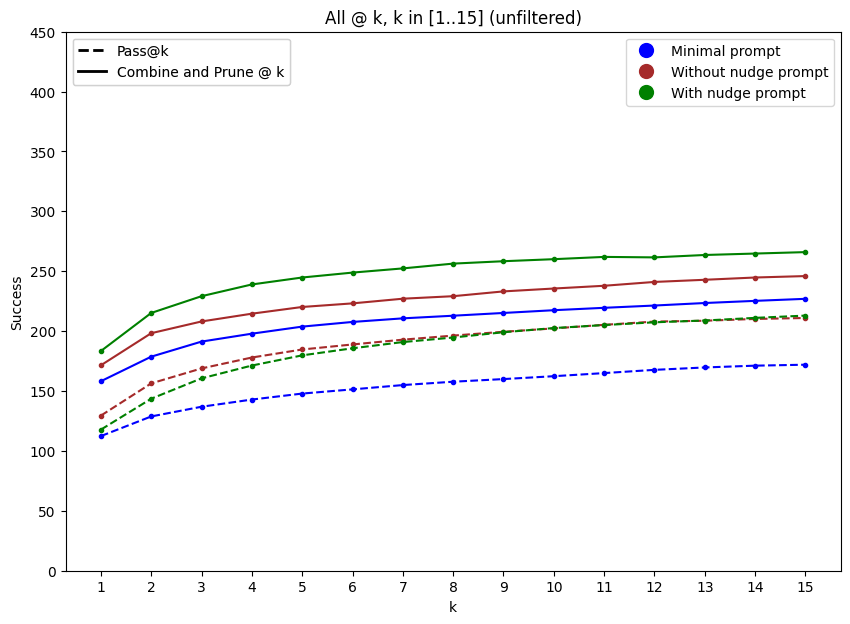

In [19]:
from matplotlib.lines import Line2D

legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Minimal prompt', markerfacecolor='blue', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Without nudge prompt', markerfacecolor='brown', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='With nudge prompt', markerfacecolor='green', markersize=12)]

legend_elements2 = [Line2D([0], [0], color='black', lw=2, label='Pass@k', linestyle='--'),
                   Line2D([0], [0], color='black', lw=2, label='Combine and Prune @ k', linestyle='-')]
x = range(1, 16)
_ = plt.figure(figsize=(10, 7))

plt.plot(x, [log_m_p[i]["pass_k_prune"] for i in log_m_p], '.-', color='blue', label='Minimal prompt')
plt.plot(x, [log_wo_n[i]["pass_k_prune"] for i in log_wo_n], '.-', color='brown', label='Without nudge prompt')
plt.plot(x, [log_w_n[i]["pass_k_prune"] for i in log_w_n], '.-', color='green', label='With nudge prompt')
plt.plot()
plt.plot(x, [log_m_p[i]["pass_k"] for i in log_m_p], '.--', color='blue', label='Minimal prompt')
plt.plot(x, [log_wo_n[i]["pass_k"] for i in log_wo_n], '.--', color='brown', label='Without nudge prompt')
plt.plot(x, [log_w_n[i]["pass_k"] for i in log_w_n], '.--', color='green', label='With nudge prompt')

plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Success')
legend1 = plt.legend(handles=legend_elements1, loc='upper right')
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=legend_elements2, loc='upper left')
plt.gca().add_artist(legend2)
plt.title('All @ k, k in [1..15] (unfiltered)')
plt.savefig('graphs/pass_at_k_prune_no_prune_combined_all_replotted.png')
plt.show()

In [25]:
minimal_prompt_log_file = open("../logs/loopy_2023_08_27_02_50_01_processed/final_output_no_prune.json")
minimal_prompt_log = json.load(minimal_prompt_log_file)
minimal_prompt_log_file.close()

without_nudges_log_file = open("../logs/loopy_2023_08_25_13_52_59_processed/final_output_no_prune.json")
without_nudges_log = json.load(without_nudges_log_file)
without_nudges_log_file.close()

with_nudges_log_file = open("../logs/loopy_2023_08_25_13_54_09_processed/final_output_no_prune.json")
with_nudges_log = json.load(with_nudges_log_file)
with_nudges_log_file.close()

In [26]:
len(minimal_prompt_log)

15

In [27]:
minimal_prompt_log_file__ = open("../logs/loopy_2023_08_27_02_50_01_processed/final_output_no_prune_k_from_1_to_15.json")
minimal_prompt_log__ = json.load(minimal_prompt_log_file__)
minimal_prompt_log_file__.close()

without_nudges_log_file__ = open("../logs/loopy_2023_08_25_13_52_59_processed/final_output_no_prune_k_from_1_to_15.json")
without_nudges_log__ = json.load(without_nudges_log_file__)
without_nudges_log_file__.close()

with_nudges_log_file__ = open("../logs/loopy_2023_08_25_13_54_09_processed/final_output_no_prune_k_from_1_to_15.json")
with_nudges_log__ = json.load(with_nudges_log_file__)
with_nudges_log_file__.close()

In [28]:
union_log_file = open("../logs/union_bg.json")
union_log = json.load(union_log_file)
union_log_file.close()

FileNotFoundError: [Errno 2] No such file or directory: '../logs/union_bg.json'

In [29]:
wn_wo_n_combined = {i:0 for i in range(1, 16)}

for i in union_log:
    wn_wo_n_combined[i["k"]] = i["pass_at_k_prune"]

NameError: name 'union_log' is not defined

In [6]:
wn_wo_n_combined

{1: 178.69999999999993,
 2: 206.75000000000006,
 3: 220.75,
 4: 229.45,
 5: 235.75,
 6: 241.2,
 7: 244.15000000000003,
 8: 247.60000000000005,
 9: 252.95,
 10: 254.8,
 11: 254.70000000000002,
 12: 258.20000000000005,
 13: 260.05000000000007,
 14: 261.6,
 15: 261.0}

In [30]:
__m_p = {i:0 for i in range(1, 15)}
__wo_n = {i:0 for i in range(1, 15)}
__w_n = {i:0 for i in range(1, 15)}

for i in minimal_prompt_log__:
    __m_p[i["k"]] = i["pass_at_k"]

for i in without_nudges_log__:
    __wo_n[i["k"]] = i["pass_at_k"]

for i in with_nudges_log__:
    __w_n[i["k"]] = i["pass_at_k"]

In [31]:
m_p = {i:0 for i in range(1, 15)}
wo_n = {i:0 for i in range(1, 15)}
w_n = {i:0 for i in range(1, 15)}

for i in minimal_prompt_log:
    m_p[i["k"]] = i["pass_at_k"]

for i in without_nudges_log:
    wo_n[i["k"]] = i["pass_at_k"]

for i in with_nudges_log:
    w_n[i["k"]] = i["pass_at_k"]

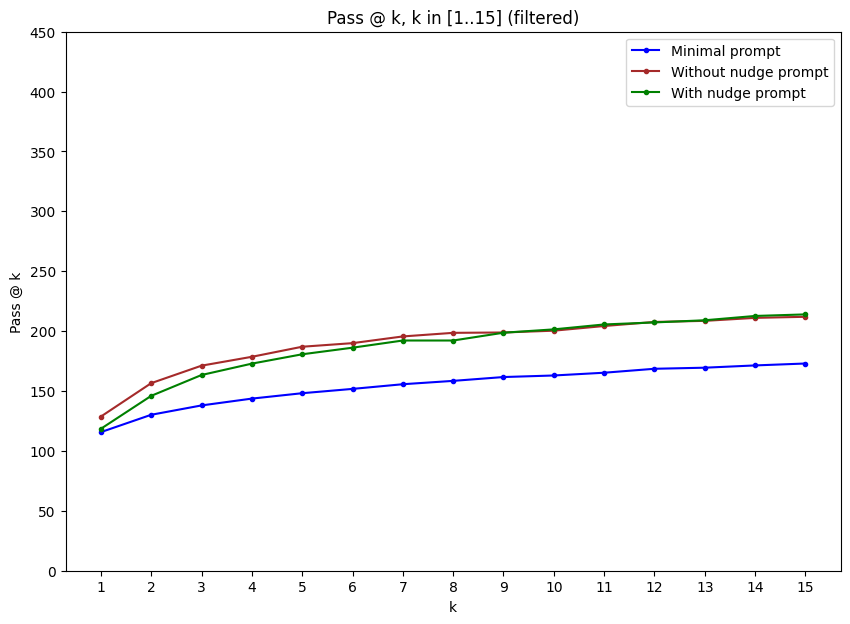

In [32]:
_ = plt.figure(figsize=(10, 7))
plt.plot(__m_p.keys(), __m_p.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(__wo_n.keys(), __wo_n.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(__w_n.keys(), __w_n.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Pass @ k')
plt.legend()
plt.title('Pass @ k, k in [1..15] (filtered)')
plt.savefig('pass_at_k_all_refiltered.png')
plt.show()

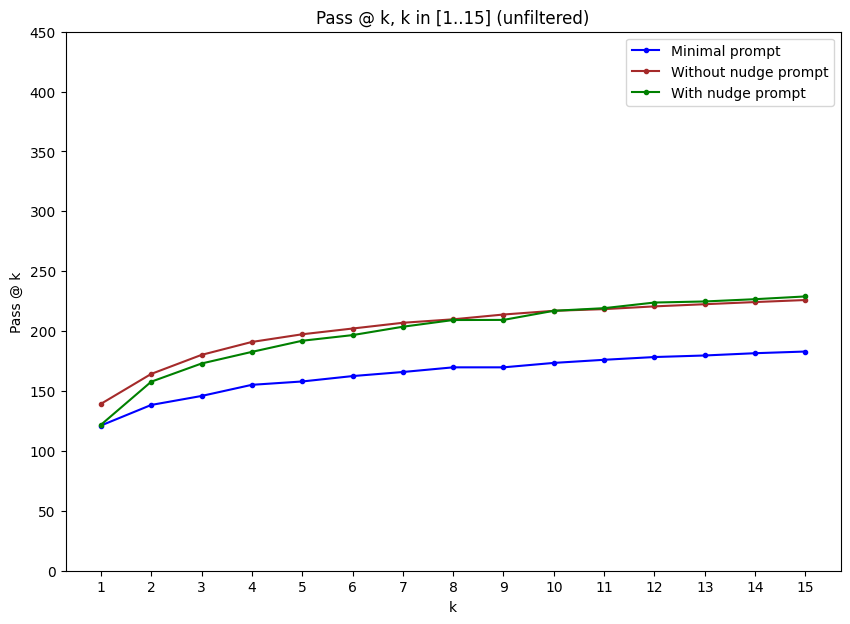

In [57]:
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p.keys(), m_p.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n.keys(), wo_n.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n.keys(), w_n.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Pass @ k')
plt.legend()
plt.title('Pass @ k, k in [1..15] (unfiltered)')
plt.savefig('pass_at_k_all.png')
plt.show()

In [33]:
x_m_p = np.array(list(m_p.keys()), dtype=np.float64)
y_m_p = np.array(list(m_p.values()), dtype=np.float64)
sl_m_p = np.diff(y_m_p) / np.diff(x_m_p)

x_w_n = np.array(list(w_n.keys()), dtype=np.float64)
y_w_n = np.array(list(w_n.values()), dtype=np.float64)
sl_w_n = np.diff(y_w_n) / np.diff(x_w_n)

x_wo_n = np.array(list(wo_n.keys()), dtype=np.float64)
y_wo_n = np.array(list(wo_n.values()), dtype=np.float64)
sl_wo_n = np.diff(y_wo_n) / np.diff(x_wo_n)

In [34]:
m_p_combine_prune = {  }
w_n_p_combine_prune = {  }
wo_n_p_combine_prune = {  }

for i in range(1, 16):
    log_file_path = f"../logs/loopy_2023_08_27_02_50_01_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            log = json.load(f)
            m_p_combine_prune[i] = log["pass_at_k"] if log["pass_at_k"] > 0 else log["pass_at_k_prune"]

    log_file_path = f"../logs/loopy_2023_08_25_13_54_09_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            log = json.load(f)
            w_n_p_combine_prune[i] = log["pass_at_k"] if log["pass_at_k"] > 0 else log["pass_at_k_prune"]

    log_file_path = f"../logs/loopy_2023_08_25_13_52_59_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            log = json.load(f)
            wo_n_p_combine_prune[i] = log["pass_at_k"] if log["pass_at_k"] > 0 else log["pass_at_k_prune"]

In [35]:
filtered_benchmarks_file = open("../experiments/one_loop_one_method_no_arrays.txt").read().split('\n')

In [36]:
filtered_benchmarks_file = [i.replace("../data/", "../") for i in filtered_benchmarks_file]

In [37]:
m_p_combine_prune_refilter = {  }
w_n_p_combine_prune_refilter = {  }
wo_n_p_combine_prune_refilter = {  }

m_p_log = None
w_n_p_log = None
wo_n_p_log = None

for i in range(1, 16):
    log_file_path = f"../logs/loopy_2023_08_27_02_50_01_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            m_p_log = json.load(f)
            new_pass_at_k = 0.0
            for j in m_p_log["logs"]:
                if j["file"] in filtered_benchmarks_file:
                    new_pass_at_k += j["pass_at_k_prune"]
            m_p_combine_prune_refilter[i] = new_pass_at_k

    log_file_path = f"../logs/loopy_2023_08_25_13_54_09_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            w_n_p_log = json.load(f)
            new_pass_at_k = 0.0
            for j in w_n_p_log["logs"]:
                if j["file"] in filtered_benchmarks_file:
                    new_pass_at_k += j["pass_at_k_prune"]
            w_n_p_combine_prune_refilter[i] = new_pass_at_k

    log_file_path = f"../logs/loopy_2023_08_25_13_52_59_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            wo_n_p_log = json.load(f)
            new_pass_at_k = 0.0
            for j in wo_n_p_log["logs"]:
                if j["file"] in filtered_benchmarks_file:
                    new_pass_at_k += j["pass_at_k_prune"]
            wo_n_p_combine_prune_refilter[i] = new_pass_at_k

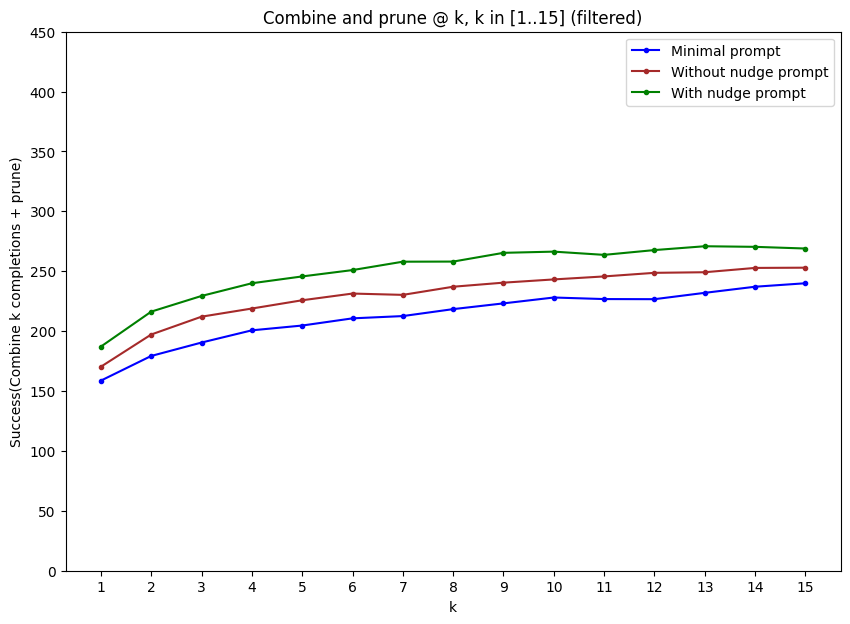

In [38]:
x = range(1, 16)
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p_combine_prune_refilter.keys(), m_p_combine_prune_refilter.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n_p_combine_prune_refilter.keys(), wo_n_p_combine_prune_refilter.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n_p_combine_prune_refilter.keys(), w_n_p_combine_prune_refilter.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Success(Combine k completions + prune)')
plt.legend()
plt.title('Combine and prune @ k, k in [1..15] (filtered)')
plt.savefig('graphs/pass_at_k_prune_all.png')
plt.show()

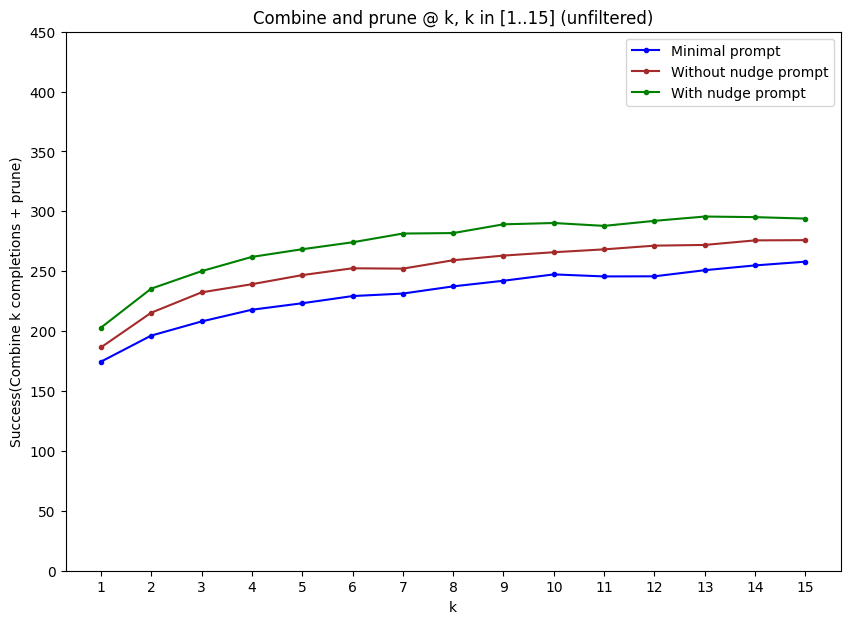

In [85]:
x = range(1, 16)
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p_combine_prune.keys(), m_p_combine_prune.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n_p_combine_prune.keys(), wo_n_p_combine_prune.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n_p_combine_prune.keys(), w_n_p_combine_prune.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Success(Combine k completions + prune)')
plt.legend()
plt.title('Combine and prune @ k, k in [1..15] (unfiltered)')
plt.savefig('graphs/pass_at_k_prune_all.png')
plt.show()

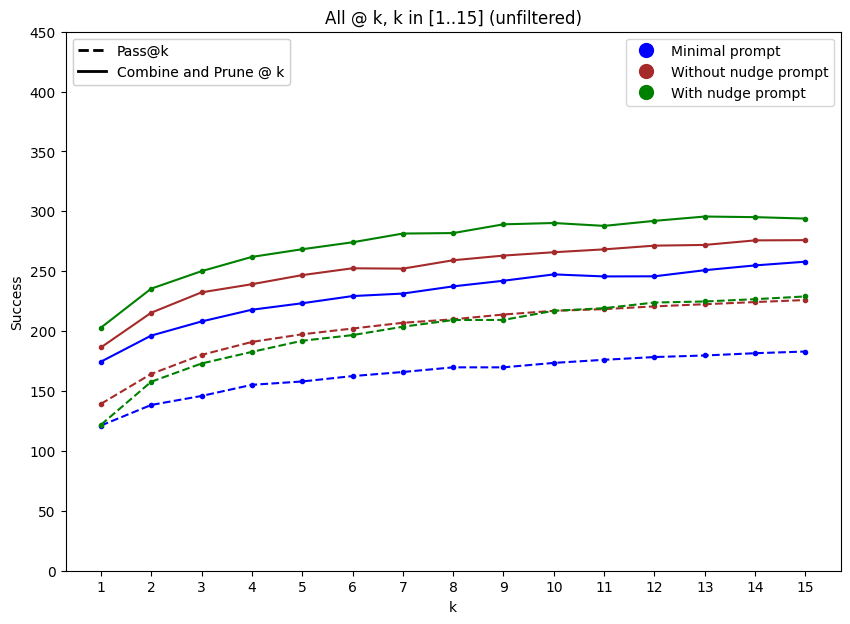

In [39]:
from matplotlib.lines import Line2D

legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Minimal prompt', markerfacecolor='blue', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Without nudge prompt', markerfacecolor='brown', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='With nudge prompt', markerfacecolor='green', markersize=12)]

legend_elements2 = [Line2D([0], [0], color='black', lw=2, label='Pass@k', linestyle='--'),
                   Line2D([0], [0], color='black', lw=2, label='Combine and Prune @ k', linestyle='-')]
x = range(1, 16)
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p_combine_prune.keys(), m_p_combine_prune.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n_p_combine_prune.keys(), wo_n_p_combine_prune.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n_p_combine_prune.keys(), w_n_p_combine_prune.values(), '.-', color='green', label='With nudge prompt')
plt.plot()
plt.plot(m_p.keys(), m_p.values(), '.--', color='blue', label='Minimal prompt')
plt.plot(wo_n.keys(), wo_n.values(), '.--', color='brown', label='Without nudge prompt')
plt.plot(w_n.keys(), w_n.values(), '.--', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Success')
legend1 = plt.legend(handles=legend_elements1, loc='upper right')
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=legend_elements2, loc='upper left')
plt.gca().add_artist(legend2)
plt.title('All @ k, k in [1..15] (unfiltered)')
plt.savefig('graphs/pass_at_k_prune_no_prune_combined_all.png')
plt.show()

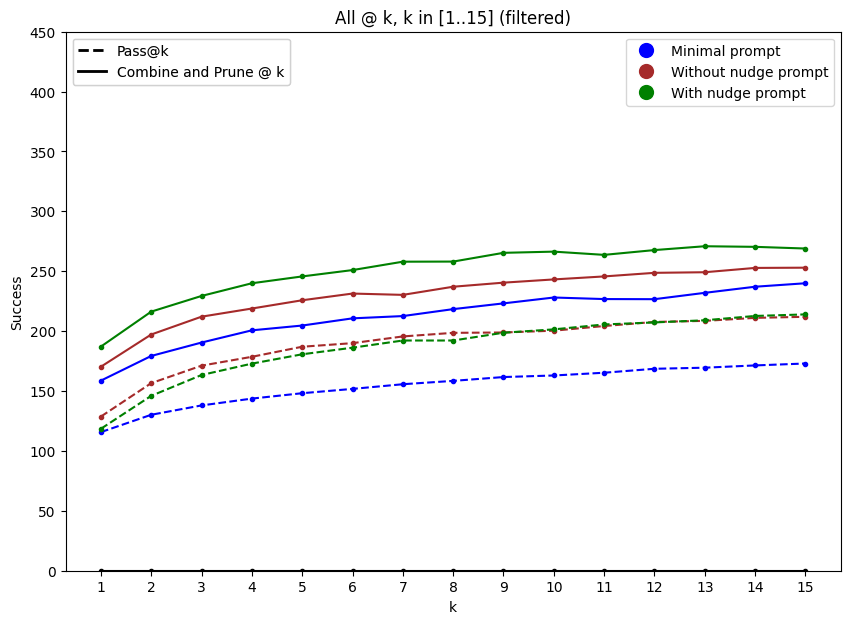

In [41]:
from matplotlib.lines import Line2D

legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Minimal prompt', markerfacecolor='blue', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Without nudge prompt', markerfacecolor='brown', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='With nudge prompt', markerfacecolor='green', markersize=12)]

legend_elements2 = [Line2D([0], [0], color='black', lw=2, label='Pass@k', linestyle='--'),
                   Line2D([0], [0], color='black', lw=2, label='Combine and Prune @ k', linestyle='-')]
x = range(1, 16)
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p_combine_prune_refilter.keys(), m_p_combine_prune_refilter.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n_p_combine_prune_refilter.keys(), wo_n_p_combine_prune_refilter.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n_p_combine_prune_refilter.keys(), w_n_p_combine_prune_refilter.values(), '.-', color='green', label='With nudge prompt')
plt.plot(wn_wo_n_combined.keys(), wn_wo_n_combined.values(), '.-', color='black', label='Union of (with and without nudge)')
plt.plot(__m_p.keys(), __m_p.values(), '.--', color='blue', label='Minimal prompt')
plt.plot(__wo_n.keys(), __wo_n.values(), '.--', color='brown', label='Without nudge prompt')
plt.plot(__w_n.keys(), __w_n.values(), '.--', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Success')
legend1 = plt.legend(handles=legend_elements1, loc='upper right')
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=legend_elements2, loc='upper left')
plt.gca().add_artist(legend2)
plt.title('All @ k, k in [1..15] (filtered)')
plt.savefig('graphs/pass_at_k_prune_no_prune_combined_all_refiltered.png')
plt.show()

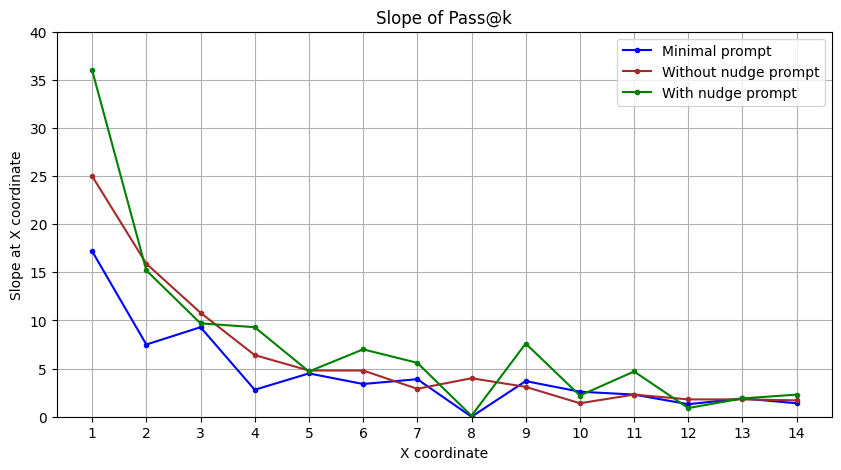

In [6]:
_ = plt.figure(figsize=(10, 5))
x = range(1, 15)
plt.plot(x, sl_m_p, '.-', label='Minimal prompt', color='blue')
plt.plot(x, sl_wo_n, '.-', label='Without nudge prompt', color='brown')
plt.plot(x, sl_w_n, '.-', label='With nudge prompt', color='green')
plt.xticks(x)
plt.ylim(0, 40)
plt.grid()
plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Slope at X coordinate')
plt.title('Slope of Pass@k')
plt.show()

In [39]:
def pass_at_k(n, c, k):
    """
    :param n: total number of samples
    :param c: number of correct samples
    :param k: k in pass@$k$
    """
    if n - c < k: return 1.0
    return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

In [40]:
wo_nudges_file = open("logs/loopy_2023_08_25_13_52_59_processed/final_output_no_prune_k_from_1_to_15_pass_at_k_formula.json", "r")
wo_nudges_log = json.load(wo_nudges_file)
wo_nudges_file.close()

w_nudges_file = open("logs/loopy_2023_08_25_13_54_09_processed/final_output_no_prune_k_from_1_to_15_pass_at_k_formula.json", "r")
w_nudges_log = json.load(w_nudges_file)
w_nudges_file.close()

mp_nudges_file = open("logs/loopy_2023_08_27_02_50_01_processed/final_output_no_prune_k_from_1_to_15_pass_at_k_formula.json", "r")
mp_nudges_log = json.load(mp_nudges_file)
mp_nudges_file.close()

In [41]:
m_p__ = {i:0 for i in range(1, 15)}
wo_n__ = {i:0 for i in range(1, 15)}
w_n__ = {i:0 for i in range(1, 15)}

for i in mp_nudges_log:
    m_p__[i["k"]] = i["pass_at_k"]

for i in wo_nudges_log:
    wo_n__[i["k"]] = i["pass_at_k"]

for i in w_nudges_log:
    w_n__[i["k"]] = i["pass_at_k"]

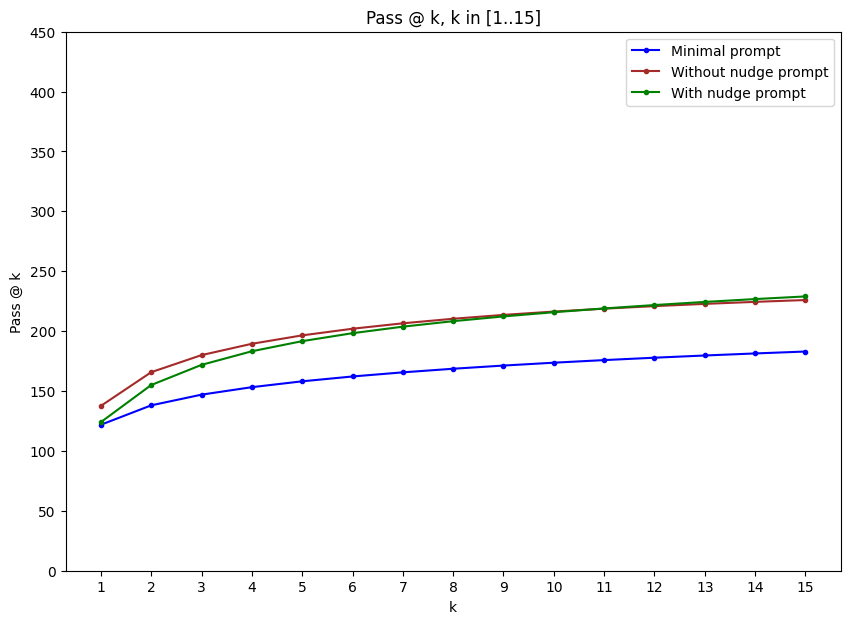

In [42]:
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p__.keys(), m_p__.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n__.keys(), wo_n__.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n__.keys(), w_n__.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Pass @ k')
plt.legend()
plt.title('Pass @ k, k in [1..15]')
plt.savefig('pass_at_k_all_from_formula_refiltered.png')
plt.show()

In [24]:
x_m_p__ = np.array(list(m_p__.keys()), dtype=np.float64)
y_m_p__ = np.array(list(m_p__.values()), dtype=np.float64)
sl_m_p__ = np.diff(y_m_p__) / np.diff(x_m_p__)

x_w_n__ = np.array(list(w_n__.keys()), dtype=np.float64)
y_w_n__ = np.array(list(w_n__.values()), dtype=np.float64)
sl_w_n__ = np.diff(y_w_n__) / np.diff(x_w_n__)

x_wo_n__ = np.array(list(wo_n__.keys()), dtype=np.float64)
y_wo_n__ = np.array(list(wo_n__.values()), dtype=np.float64)
sl_wo_n__ = np.diff(y_wo_n__) / np.diff(x_wo_n__)

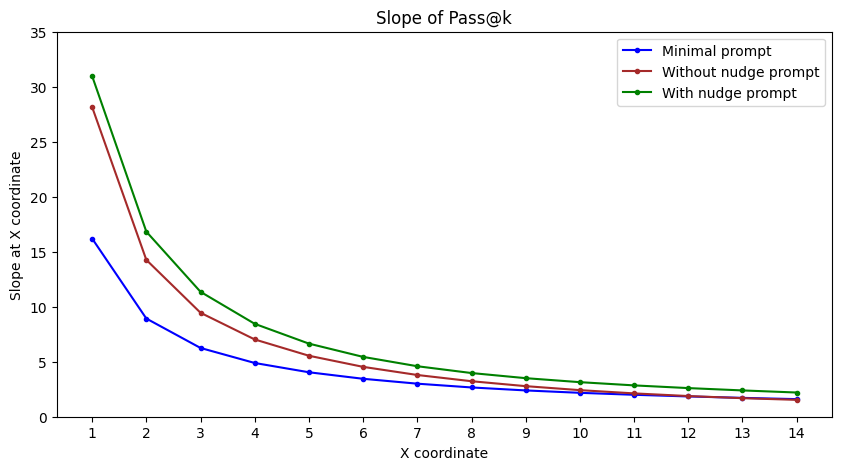

In [25]:
_ = plt.figure(figsize=(10, 5))
x = range(1, 15)
plt.plot(x, sl_m_p__, '.-', label='Minimal prompt', color='blue')
plt.plot(x, sl_wo_n__, '.-', label='Without nudge prompt', color='brown')
plt.plot(x, sl_w_n__, '.-', label='With nudge prompt', color='green')
plt.xticks(x)
plt.ylim(0, 35)
plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Slope at X coordinate')
plt.title('Slope of Pass@k')
plt.show()